### Solve the spatially distributed Lotka-Volterra predator-prey system with diffusion

This is also referred to as a reaction-diffusion system.

\begin{align*}
\frac{d TableCoral}{dt} &= a(TableCoral) - b(TableCoral) (Starfish)\\
\frac{d BranchCoral}{dt} &= c(BranchCoral) - d(BranchCoral)(Starfish)\\
\frac{d Spores}{dt} &= e(Starfish) - Spores +\kappa \nabla^2 Spores\\
\frac{d Starfish}{dt} &= f[b(TableCoral) + d(BranchCoral)](Spores) - g(Starfish)\\
\end{align*}

Here we assume:
- Table Coral and Branch Coral grow indepently of eachother, a,c > 0
- Coral does not diffuse or grow into new places
- Only Starfish can eat Coral, b,d>0
- Any Starfish can produce Spores, and a lot of them e >1
- Spores are can diffuse, but Starfish cannot
- Only a small fraction of spores that interact with Coral can become starfish, 0<f<1
- Without Spores interacting with Coral, starfish die off at rate, 0<g<1

In [217]:
from scipy import *
from scipy.integrate import odeint
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

In [218]:
L = 1
N = 40
x = linspace(0,1,N)
h = L/(N-1)

# Build a Laplacian differentiation matrix.
D2 = (diag(-2*ones(N),0)+diag(ones(N-1),-1)+diag(ones(N-1),1))
D2[0,0]=-1 ## must set boundary conditions
D2[0,1]=1 
D2[-1,-1]=-1
D2[-1,-2]=1
D2 = D2/h**2

def dxdt(x,t,a=0.32,b=0.12,c=0.4,d=0.18,e=1,f=0.08,g=0.1,kappa=.2):
    '''Lotka-Volterra predator prey system with diffusion.
    Assume
    - Coral does not diffuse, nor do stars, relative to the size of the reef
    - Only spores stars diffuse across the reef at rate kappa
    - Only stars eat coral, babies do not consume anything
    - Table coral grows slower than branching:                        a < c
    - Table is eaten substantially slower than branching:             b < d
    - Stars live for a certain amount of time but die off gradaully, are eaten by predators, etc:  g
    - At any given time a certain amount of stars produce offspring:  e
    - At any given time a certain amount of babies reach adulthood:   f
    - There are initiatives by humans to remove Stars, but only in the case of outbreaks, FIX THIS
    '''
    table = x[:len(x)//4]
    branch = x[len(x)//4:2*len(x)//4]
    spores = x[2*len(x)//4:3*len(x)//4]
    stars = x[3*len(x)//4:]
    d_table_dt  =  a*table - b*table*stars
    d_branch_dt =  c*branch - d*branch*stars
    d_spores_dt   =  e*stars - spores + kappa*(D2.dot(spores))
    d_stars_dt  =  f*(b*table + d*branch)*spores - g*stars
    out = reshape(array([d_table_dt,d_branch_dt,d_spores_dt,d_stars_dt]),(len(x),))
    return(out)

In [219]:
time      = r_[0:60:500j]
tableIC   = 3*(1+cos(pi*x*16))+2
branchIC  = 2*(1-cos(pi*x*8))+2
sporesIC    = 2*(1-cos(pi*x))
starsIC   = reshape(array([zeros(N//2),x[:len(x)//2]*10]),(N,))

IC = reshape(array([tableIC,branchIC,sporesIC,starsIC]),(4*N,))

In [220]:
u = odeint(dxdt,IC,time)

<IPython.core.display.Javascript object>


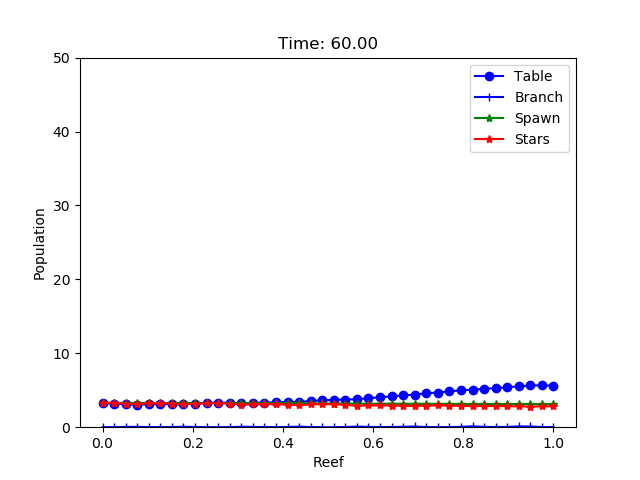

In [221]:
fig, ax = plt.subplots()
line1, = ax.plot(x,u[0,:N],'bo-')
line2, = ax.plot(x,u[0,N:2*N],'b|-')
line3, = ax.plot(x,u[0,2*N:3*N],'g*-')
line4, = ax.plot(x,u[0,3*N:],'r*-')
plt.ylim((0,50))
plt.legend(('Table','Branch','Spawn','Stars'))
plt.xlabel('Reef')
plt.ylabel('Population')

def animate(k):
    line1.set_ydata(u[k,:N])
    line2.set_ydata(u[k,N:2*N])
    line3.set_ydata(u[k,2*N:3*N])
    line4.set_ydata(u[k,3*N:])
    plt.title('Time: {0:5.2f}'.format(time[k]))
    return (line1,line2,line3,line4,)

ani = animation.FuncAnimation(fig, animate, frames=arange(1, 50000), 
                              interval=50, blit=True)

plt.show()

In [223]:
fig, ax = plt.subplots()
line1, = ax.plot(x,u[0,:N],'bo-')
line2, = ax.plot(x,u[0,N:2*N],'b|-')
line3, = ax.plot(x,u[0,2*N:3*N],'g*-')
line4, = ax.plot(x,u[0,3*N:],'r*-')
plt.ylim((0,50))

<IPython.core.display.Javascript object>

(0, 50)